In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas 

from lib import loading

df = loading.load_data()
print("We have {0} labelled examples.".format(len(df)))

Read the data file from ./airline-twitter-sentiment/Tweets.csv
We have 14640 labelled examples.


## We will try various classification algorithms

We will try the following:
* Naive Bayes
* kNearest Neighbours
* SVM
* Gradient Descent
* Random Forest

We mention that in this docuemnt we take the best options that we have found, after exploring the hyperparameter space for each algorithm in its own separate Notebook.

In [2]:
from lib import processing

training_data, testing_data = processing.process_data(df, sample_size=1)

Using a total of 14640 tweets
Training sample size: 13115
Testing sample size: 1525


In [3]:
from sklearn.metrics import confusion_matrix
from lib import classify
from nltk.sentiment import SentimentAnalyzer

sentim_analyzer = SentimentAnalyzer()
classify.add_features(training_data, sentim_analyzer)
train, test = classify.extract_features(training_data, testing_data, sentim_analyzer)

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(3)
    plt.xticks(tick_marks, ['negative', 'neutal', 'positive'], rotation=45)
    plt.yticks(tick_marks, ['negative', 'neutal', 'positive'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def print_evaluation(evaluation):
    for key, value in sorted(evaluation.items()):
        print(key, ":", value)

def evaluate_trainer(trainer):
    classifier, evaluation, _ = classify.train_model(train, test, sentim_analyzer, trainer)
    y_test = [y for _, y in test]
    y_pred = [classifier.classify(f) for f, _ in test]
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)
    print_evaluation(evaluation)
    return classifier

Unigram features 1721
Bigram features:  1208


## Naive Bayes

Training: Naive Bayes Classifier
Training classifier
Evaluating NaiveBayesClassifier results...
Accuracy : 0.7960655737704918
F-measure [negative] : 0.8654383026242323
F-measure [neutral] : 0.6612903225806451
F-measure [positive] : 0.7495145631067962
Precision [negative] : 0.8969907407407407
Precision [neutral] : 0.615
Precision [positive] : 0.7394636015325671
Recall [negative] : 0.8360302049622438
Recall [neutral] : 0.7151162790697675
Recall [positive] : 0.7598425196850394


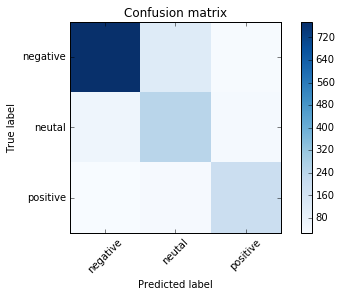

In [4]:
from nltk.classify import NaiveBayesClassifier
trainer = {
    'name': 'Naive Bayes Classifier',
    'train': NaiveBayesClassifier.train,
}
naive_bayes = evaluate_trainer(trainer)


## K Nearest Neighbours

Training: K Nearest Neighbours Classifier
Training classifier
Evaluating SklearnClassifier results...
Accuracy : 0.5219672131147541
F-measure [negative] : 0.5983827493261455
F-measure [neutral] : 0.4224364592462752
F-measure [positive] : 0.5223529411764706
Precision [negative] : 0.7971274685816876
Precision [neutral] : 0.30238393977415307
Precision [positive] : 0.6491228070175439
Recall [negative] : 0.47896440129449835
Recall [neutral] : 0.7005813953488372
Recall [positive] : 0.43700787401574803


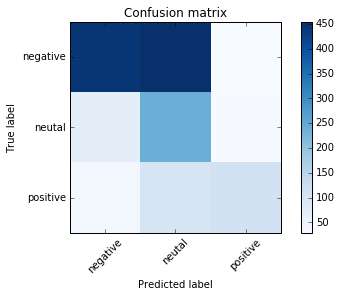

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from nltk.classify import SklearnClassifier
trainer = {
    "name": "K Nearest Neighbours Classifier",
    "train": SklearnClassifier(KNeighborsClassifier()).train,
}
knn = evaluate_trainer(trainer)

## SVM

Training: Linear SVC Classifier
Training classifier
Evaluating SklearnClassifier results...
Accuracy : 0.7888524590163934
F-measure [negative] : 0.8621983914209114
F-measure [neutral] : 0.6100719424460432
F-measure [positive] : 0.763265306122449
Precision [negative] : 0.8571428571428571
Precision [neutral] : 0.603988603988604
Precision [positive] : 0.7923728813559322
Recall [negative] : 0.8673139158576052
Recall [neutral] : 0.6162790697674418
Recall [positive] : 0.7362204724409449


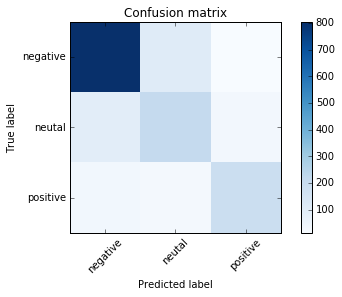

In [6]:
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
trainer = {
    "name": "Linear SVC Classifier",
    "train": SklearnClassifier(LinearSVC(dual = False, # because number of samples > number of features,
                                        )).train,
}
svm = evaluate_trainer(trainer)

## Gradient Descent

Training: Gradient Descent Classifier
Training classifier
Evaluating SklearnClassifier results...
Accuracy : 0.8045901639344263
F-measure [negative] : 0.8753260302556078
F-measure [neutral] : 0.6226415094339623
F-measure [positive] : 0.7645875251509054
Precision [negative] : 0.8474747474747475
Precision [neutral] : 0.678082191780822
Precision [positive] : 0.7818930041152263
Recall [negative] : 0.9050701186623517
Recall [neutral] : 0.5755813953488372
Recall [positive] : 0.7480314960629921


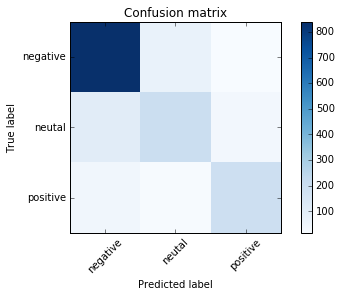

In [7]:
from sklearn.linear_model import SGDClassifier
trainer = {
    "name": "Gradient Descent Classifier",
    "train": SklearnClassifier(SGDClassifier()).train,
}
gradient_descent = evaluate_trainer(trainer)

In [8]:
## Random Forest

Training: Random Forest Classifier
Training classifier
Evaluating SklearnClassifier results...
Accuracy : 0.740327868852459
F-measure [negative] : 0.8277661795407097
F-measure [neutral] : 0.5184049079754601
F-measure [positive] : 0.6929460580912863
Precision [negative] : 0.8018200202224469
Precision [neutral] : 0.5487012987012987
Precision [positive] : 0.7324561403508771
Recall [negative] : 0.8554476806903991
Recall [neutral] : 0.49127906976744184
Recall [positive] : 0.65748031496063


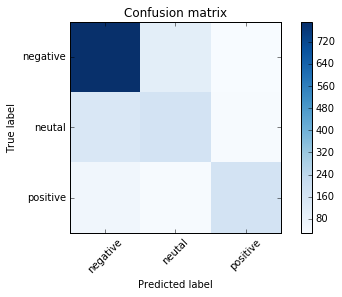

In [9]:
from sklearn.ensemble import RandomForestClassifier
trainer = {
    "name": "Random Forest Classifier",
    "train": SklearnClassifier(RandomForestClassifier()).train,
}
random_forest = evaluate_trainer(trainer)